<H3>Load libraries</H3>

In [1]:
import numpy as np
import os
from scipy.misc import imread, imsave, imresize, imshow
import random
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import gc

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [2]:
train1 = pd.read_csv('train_part\\6\\X_train_6_a.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train2 = pd.read_csv('train_part\\6\\X_train_6_b.csv')

In [4]:
train1 = train1.sample(frac=1).reset_index(drop=True)

In [5]:
train2 = train2.sample(frac=1).reset_index(drop=True)

In [6]:
xtrain1 = train1[:100000]
xtrain2 = train1[100000:200000]
xtrain3 = train1[200000:]

In [7]:
del train1
gc.collect()

14

In [8]:
xtrain1 = xtrain1.append(train2[:100000])
xtrain2 = xtrain2.append(train2[100000:200000])
xtrain3 = xtrain3.append(train2[200000:])

In [9]:
del train2
gc.collect()

24

In [10]:
train3 = pd.read_csv('train_part\\6\\X_train_6_c.csv')

In [11]:
train3 = train3.sample(frac=1).reset_index(drop=True)

In [12]:
xtrain1 = xtrain1.append(train3[:100000])
xtrain2 = xtrain2.append(train3[100000:200000])
xtrain3 = xtrain3.append(train3[200000:])

In [13]:
del train3
gc.collect()

31

In [14]:
train4 = pd.read_csv('train_part\\6\\X_train_6_d.csv')

In [15]:
train4 = train4.sample(frac=1).reset_index(drop=True)

In [16]:
xtrain1 = xtrain1.append(train4[:100000])
xtrain2 = xtrain2.append(train4[100000:200000])
xtrain3 = xtrain3.append(train4[200000:])

In [17]:
del train4
gc.collect()

31

In [18]:
xtrain1.drop(xtrain1.columns[[0,1,2,6,7]], axis = 1, inplace = True)
xtrain2.drop(xtrain2.columns[[0,1,2,6,7]], axis = 1, inplace = True)
xtrain3.drop(xtrain3.columns[[0,1,2,6,7]], axis = 1, inplace = True)

xtrain1.drop('PH', axis=1, inplace=True)
xtrain2.drop('PH', axis=1, inplace=True)
xtrain3.drop('PH', axis=1, inplace=True)

In [19]:
xtrain1['Month1']=np.where(xtrain1['Month']==1.0, 1,0)
xtrain1['Month2']=np.where(xtrain1['Month']==2.0, 1,0)
xtrain1['Month3']=np.where(xtrain1['Month']==3.0, 1,0)
xtrain1['Month4']=np.where(xtrain1['Month']==4.0, 1,0)
xtrain1['Month5']=np.where(xtrain1['Month']==5.0, 1,0)
xtrain1['Month6']=np.where(xtrain1['Month']==6.0, 1,0)
xtrain1['Month7']=np.where(xtrain1['Month']==7.0, 1,0)
xtrain1['Month8']=np.where(xtrain1['Month']==8.0, 1,0)
xtrain1['Month9']=np.where(xtrain1['Month']==9.0, 1,0)
xtrain1['Month10']=np.where(xtrain1['Month']==10.0, 1,0)
xtrain1['Month11']=np.where(xtrain1['Month']==11.0, 1,0)
xtrain1['Month12']=np.where(xtrain1['Month']==12.0, 1,0)
xtrain1['Hour1']=np.where(xtrain1['Hour']==1.0, 1,0)
xtrain1['Hour2']=np.where(xtrain1['Hour']==2.0, 1,0)
xtrain1['Hour3']=np.where(xtrain1['Hour']==3.0, 1,0)
xtrain1['Hour4']=np.where(xtrain1['Hour']==4.0, 1,0)
xtrain1['Hour5']=np.where(xtrain1['Hour']==5.0, 1,0)
xtrain1['Hour6']=np.where(xtrain1['Hour']==6.0, 1,0)
xtrain1['Hour7']=np.where(xtrain1['Hour']==7.0, 1,0)
xtrain1['Hour8']=np.where(xtrain1['Hour']==8.0, 1,0)
xtrain1['Hour9']=np.where(xtrain1['Hour']==9.0, 1,0)
xtrain1['Hour10']=np.where(xtrain1['Hour']==10.0, 1,0)
xtrain1['Hour11']=np.where(xtrain1['Hour']==11.0, 1,0)
xtrain1['Hour12']=np.where(xtrain1['Hour']==12.0, 1,0)
xtrain1['Hour13']=np.where(xtrain1['Hour']==13.0, 1,0)
xtrain1['Hour14']=np.where(xtrain1['Hour']==14.0, 1,0)
xtrain1['Hour15']=np.where(xtrain1['Hour']==15.0, 1,0)
xtrain1['Hour16']=np.where(xtrain1['Hour']==16.0, 1,0)
xtrain1['Hour17']=np.where(xtrain1['Hour']==17.0, 1,0)
xtrain1['Hour18']=np.where(xtrain1['Hour']==18.0, 1,0)
xtrain1['Hour19']=np.where(xtrain1['Hour']==19.0, 1,0)
xtrain1['Hour20']=np.where(xtrain1['Hour']==20.0, 1,0)
xtrain1['Hour21']=np.where(xtrain1['Hour']==21.0, 1,0)
xtrain1['Hour22']=np.where(xtrain1['Hour']==22.0, 1,0)
xtrain1['Hour23']=np.where(xtrain1['Hour']==23.0, 1,0)
xtrain1['Hour24']=np.where(xtrain1['Hour']==24.0, 1,0)
xtrain2['Month1']=np.where(xtrain2['Month']==1.0, 1,0)
xtrain2['Month2']=np.where(xtrain2['Month']==2.0, 1,0)
xtrain2['Month3']=np.where(xtrain2['Month']==3.0, 1,0)
xtrain2['Month4']=np.where(xtrain2['Month']==4.0, 1,0)
xtrain2['Month5']=np.where(xtrain2['Month']==5.0, 1,0)
xtrain2['Month6']=np.where(xtrain2['Month']==6.0, 1,0)
xtrain2['Month7']=np.where(xtrain2['Month']==7.0, 1,0)
xtrain2['Month8']=np.where(xtrain2['Month']==8.0, 1,0)
xtrain2['Month9']=np.where(xtrain2['Month']==9.0, 1,0)
xtrain2['Month10']=np.where(xtrain2['Month']==10.0, 1,0)
xtrain2['Month11']=np.where(xtrain2['Month']==11.0, 1,0)
xtrain2['Month12']=np.where(xtrain2['Month']==12.0, 1,0)
xtrain2['Hour1']=np.where(xtrain2['Hour']==1.0, 1,0)
xtrain2['Hour2']=np.where(xtrain2['Hour']==2.0, 1,0)
xtrain2['Hour3']=np.where(xtrain2['Hour']==3.0, 1,0)
xtrain2['Hour4']=np.where(xtrain2['Hour']==4.0, 1,0)
xtrain2['Hour5']=np.where(xtrain2['Hour']==5.0, 1,0)
xtrain2['Hour6']=np.where(xtrain2['Hour']==6.0, 1,0)
xtrain2['Hour7']=np.where(xtrain2['Hour']==7.0, 1,0)
xtrain2['Hour8']=np.where(xtrain2['Hour']==8.0, 1,0)
xtrain2['Hour9']=np.where(xtrain2['Hour']==9.0, 1,0)
xtrain2['Hour10']=np.where(xtrain2['Hour']==10.0, 1,0)
xtrain2['Hour11']=np.where(xtrain2['Hour']==11.0, 1,0)
xtrain2['Hour12']=np.where(xtrain2['Hour']==12.0, 1,0)
xtrain2['Hour13']=np.where(xtrain2['Hour']==13.0, 1,0)
xtrain2['Hour14']=np.where(xtrain2['Hour']==14.0, 1,0)
xtrain2['Hour15']=np.where(xtrain2['Hour']==15.0, 1,0)
xtrain2['Hour16']=np.where(xtrain2['Hour']==16.0, 1,0)
xtrain2['Hour17']=np.where(xtrain2['Hour']==17.0, 1,0)
xtrain2['Hour18']=np.where(xtrain2['Hour']==18.0, 1,0)
xtrain2['Hour19']=np.where(xtrain2['Hour']==19.0, 1,0)
xtrain2['Hour20']=np.where(xtrain2['Hour']==20.0, 1,0)
xtrain2['Hour21']=np.where(xtrain2['Hour']==21.0, 1,0)
xtrain2['Hour22']=np.where(xtrain2['Hour']==22.0, 1,0)
xtrain2['Hour23']=np.where(xtrain2['Hour']==23.0, 1,0)
xtrain2['Hour24']=np.where(xtrain2['Hour']==24.0, 1,0)
xtrain3['Month1']=np.where(xtrain3['Month']==1.0, 1,0)
xtrain3['Month2']=np.where(xtrain3['Month']==2.0, 1,0)
xtrain3['Month3']=np.where(xtrain3['Month']==3.0, 1,0)
xtrain3['Month4']=np.where(xtrain3['Month']==4.0, 1,0)
xtrain3['Month5']=np.where(xtrain3['Month']==5.0, 1,0)
xtrain3['Month6']=np.where(xtrain3['Month']==6.0, 1,0)
xtrain3['Month7']=np.where(xtrain3['Month']==7.0, 1,0)
xtrain3['Month8']=np.where(xtrain3['Month']==8.0, 1,0)
xtrain3['Month9']=np.where(xtrain3['Month']==9.0, 1,0)
xtrain3['Month10']=np.where(xtrain3['Month']==10.0, 1,0)
xtrain3['Month11']=np.where(xtrain3['Month']==11.0, 1,0)
xtrain3['Month12']=np.where(xtrain3['Month']==12.0, 1,0)
xtrain3['Hour1']=np.where(xtrain3['Hour']==1.0, 1,0)
xtrain3['Hour2']=np.where(xtrain3['Hour']==2.0, 1,0)
xtrain3['Hour3']=np.where(xtrain3['Hour']==3.0, 1,0)
xtrain3['Hour4']=np.where(xtrain3['Hour']==4.0, 1,0)
xtrain3['Hour5']=np.where(xtrain3['Hour']==5.0, 1,0)
xtrain3['Hour6']=np.where(xtrain3['Hour']==6.0, 1,0)
xtrain3['Hour7']=np.where(xtrain3['Hour']==7.0, 1,0)
xtrain3['Hour8']=np.where(xtrain3['Hour']==8.0, 1,0)
xtrain3['Hour9']=np.where(xtrain3['Hour']==9.0, 1,0)
xtrain3['Hour10']=np.where(xtrain3['Hour']==10.0, 1,0)
xtrain3['Hour11']=np.where(xtrain3['Hour']==11.0, 1,0)
xtrain3['Hour12']=np.where(xtrain3['Hour']==12.0, 1,0)
xtrain3['Hour13']=np.where(xtrain3['Hour']==13.0, 1,0)
xtrain3['Hour14']=np.where(xtrain3['Hour']==14.0, 1,0)
xtrain3['Hour15']=np.where(xtrain3['Hour']==15.0, 1,0)
xtrain3['Hour16']=np.where(xtrain3['Hour']==16.0, 1,0)
xtrain3['Hour17']=np.where(xtrain3['Hour']==17.0, 1,0)
xtrain3['Hour18']=np.where(xtrain3['Hour']==18.0, 1,0)
xtrain3['Hour19']=np.where(xtrain3['Hour']==19.0, 1,0)
xtrain3['Hour20']=np.where(xtrain3['Hour']==20.0, 1,0)
xtrain3['Hour21']=np.where(xtrain3['Hour']==21.0, 1,0)
xtrain3['Hour22']=np.where(xtrain3['Hour']==22.0, 1,0)
xtrain3['Hour23']=np.where(xtrain3['Hour']==23.0, 1,0)
xtrain3['Hour24']=np.where(xtrain3['Hour']==24.0, 1,0)

In [20]:
xtrain1.drop('Month', axis = 1, inplace = True)
xtrain2.drop('Month', axis = 1, inplace = True)
xtrain3.drop('Month', axis = 1, inplace = True)

xtrain1.drop('Hour', axis = 1, inplace = True)
xtrain2.drop('Hour', axis = 1, inplace = True)
xtrain3.drop('Hour', axis = 1, inplace = True)

In [21]:
y1 = xtrain1.pop('FF')
y2 = xtrain2.pop('FF')
y3 = xtrain3.pop('FF')

In [22]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [23]:
del xtrain1
gc.collect()

322

In [24]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

In [25]:
del xtrain2
gc.collect()

7

In [26]:
xgtrain3 = xgb.DMatrix(xtrain3, label = y3)

In [27]:
del xtrain3
gc.collect()

7

<H3>Train the model</H3>

In [28]:
params = {}
params["objective"] = "reg:linear"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'rmse'
params["subsample"] = 0.9
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["seed"] = 2016
params["eta"] = 0.1

plst = list(params.items())
num_rounds = 500
early_stopping_rounds = 10

watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]

model_6_1 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:2845.23	eval-rmse:2840.84
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:2565.6	eval-rmse:2561.65
[2]	train-rmse:2314.38	eval-rmse:2310.86
[3]	train-rmse:2088.36	eval-rmse:2085.21
[4]	train-rmse:1885.25	eval-rmse:1882.48
[5]	train-rmse:1702.64	eval-rmse:1700.2
[6]	train-rmse:1538.62	eval-rmse:1536.42
[7]	train-rmse:1391.34	eval-rmse:1389.47
[8]	train-rmse:1259.04	eval-rmse:1257.43
[9]	train-rmse:1140.01	eval-rmse:1138.76
[10]	train-rmse:1033.55	eval-rmse:1032.58
[11]	train-rmse:938.374	eval-rmse:937.705
[12]	train-rmse:852.662	eval-rmse:852.279
[13]	train-rmse:775.74	eval-rmse:775.701
[14]	train-rmse:707.089	eval-rmse:707.376
[15]	train-rmse:645.564	eval-rmse:646.173
[16]	train-rmse:590.893	eval-rmse:591.863
[17]	train-rmse:542.215	eval-rmse:543.503
[18]	train-rmse:499.029	eval-rmse:500.62
[19]	train-rmse:460.941	eval-rmse:462.82
[20]	train-rmse:426.315	eval-rms

In [29]:
watchlist = [(xgtrain3,'train'),(xgtrain1, 'eval')]
model_6_2 = xgb.train(plst, xgtrain3, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:2843.97	eval-rmse:2841.17
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:2564.51	eval-rmse:2561.99
[2]	train-rmse:2313.84	eval-rmse:2311.56
[3]	train-rmse:2087.97	eval-rmse:2085.95
[4]	train-rmse:1885.25	eval-rmse:1883.41
[5]	train-rmse:1702.57	eval-rmse:1700.98
[6]	train-rmse:1538.36	eval-rmse:1536.98
[7]	train-rmse:1391.22	eval-rmse:1390.02
[8]	train-rmse:1259.05	eval-rmse:1258.03
[9]	train-rmse:1140.33	eval-rmse:1139.52
[10]	train-rmse:1033.52	eval-rmse:1032.96
[11]	train-rmse:937.914	eval-rmse:937.6
[12]	train-rmse:852.068	eval-rmse:851.942
[13]	train-rmse:775.316	eval-rmse:775.456
[14]	train-rmse:706.654	eval-rmse:707.019
[15]	train-rmse:645.405	eval-rmse:646.058
[16]	train-rmse:590.64	eval-rmse:591.584
[17]	train-rmse:542.069	eval-rmse:543.309
[18]	train-rmse:498.904	eval-rmse:500.448
[19]	train-rmse:460.67	eval-rmse:462.535
[20]	train-rmse:426.94	eval-rms

<H3>Validate the model</H3>

In [30]:
pred_xg6_1 = model_6_1.predict(xgtrain3)

In [31]:
sqrt(mean_squared_error(y3, pred_xg6_1))

118.63412025661913

In [32]:
pred_xg6_2 = model_6_2.predict(xgtrain2)

In [33]:
sqrt(mean_squared_error(y2, pred_xg6_2))

118.41754114161402

In [34]:
del pred_xg6_1, pred_xg6_2
gc.collect()

21

In [35]:
del xgtrain1, xgtrain2, xgtrain3, y1, y2, y3
gc.collect()

14

In [36]:
test = pd.read_csv('test\\CAX_Test.csv')

In [37]:
test = test[test.PH==6]

In [38]:
test.shape

(213531, 227)

In [39]:
test.drop(test.columns[[0,1,2,6,7]], axis = 1, inplace = True)

In [40]:
test.drop('PH', axis=1, inplace=True)

In [41]:
test['Month1']=np.where(test['Month']==1.0, 1,0)
test['Month2']=np.where(test['Month']==2.0, 1,0)
test['Month3']=np.where(test['Month']==3.0, 1,0)
test['Month4']=np.where(test['Month']==4.0, 1,0)
test['Month5']=np.where(test['Month']==5.0, 1,0)
test['Month6']=np.where(test['Month']==6.0, 1,0)
test['Month7']=np.where(test['Month']==7.0, 1,0)
test['Month8']=np.where(test['Month']==8.0, 1,0)
test['Month9']=np.where(test['Month']==9.0, 1,0)
test['Month10']=np.where(test['Month']==10.0, 1,0)
test['Month11']=np.where(test['Month']==11.0, 1,0)
test['Month12']=np.where(test['Month']==12.0, 1,0)
test['Hour1']=np.where(test['Hour']==1.0, 1,0)
test['Hour2']=np.where(test['Hour']==2.0, 1,0)
test['Hour3']=np.where(test['Hour']==3.0, 1,0)
test['Hour4']=np.where(test['Hour']==4.0, 1,0)
test['Hour5']=np.where(test['Hour']==5.0, 1,0)
test['Hour6']=np.where(test['Hour']==6.0, 1,0)
test['Hour7']=np.where(test['Hour']==7.0, 1,0)
test['Hour8']=np.where(test['Hour']==8.0, 1,0)
test['Hour9']=np.where(test['Hour']==9.0, 1,0)
test['Hour10']=np.where(test['Hour']==10.0, 1,0)
test['Hour11']=np.where(test['Hour']==11.0, 1,0)
test['Hour12']=np.where(test['Hour']==12.0, 1,0)
test['Hour13']=np.where(test['Hour']==13.0, 1,0)
test['Hour14']=np.where(test['Hour']==14.0, 1,0)
test['Hour15']=np.where(test['Hour']==15.0, 1,0)
test['Hour16']=np.where(test['Hour']==16.0, 1,0)
test['Hour17']=np.where(test['Hour']==17.0, 1,0)
test['Hour18']=np.where(test['Hour']==18.0, 1,0)
test['Hour19']=np.where(test['Hour']==19.0, 1,0)
test['Hour20']=np.where(test['Hour']==20.0, 1,0)
test['Hour21']=np.where(test['Hour']==21.0, 1,0)
test['Hour22']=np.where(test['Hour']==22.0, 1,0)
test['Hour23']=np.where(test['Hour']==23.0, 1,0)
test['Hour24']=np.where(test['Hour']==24.0, 1,0)

In [42]:
test.drop('Month', axis = 1, inplace = True)
test.drop('Hour', axis = 1, inplace = True)
test.drop('FF', axis = 1, inplace = True)
test_id = test.pop('id')

In [43]:
xgtest = xgb.DMatrix(test)

<H3>Predict on test</H3>

In [44]:
pred1 = model_6_1.predict(xgtest)
pred2 = model_6_2.predict(xgtest)

In [45]:
submission_6 = pd.DataFrame(columns = ['id', 'pred1', 'pred2', 'FF'])

In [46]:
submission_6['id'] = test_id
submission_6['pred1'] = pred1
submission_6['pred2'] = pred2
submission_6['FF'] = (submission_6['pred1']+submission_6['pred2'])/2.0

In [47]:
submission_6.drop('pred1', axis = 1, inplace = True)
submission_6.drop('pred2', axis = 1, inplace = True)

In [48]:
submission_6.to_csv('0819\\submission_6a.csv', index = False)

<H3>Feature importance</H3>

In [50]:
feat_imp_1 = pd.Series(model_6_1.get_fscore()).sort_values(ascending=False)
feat_imp_2 = pd.Series(model_6_2.get_fscore()).sort_values(ascending=False)

In [51]:
%matplotlib inline

In [52]:
feat_imp_1.to_csv('feat_imp_6_1a.csv')
feat_imp_2.to_csv('feat_imp_6_2a.csv')

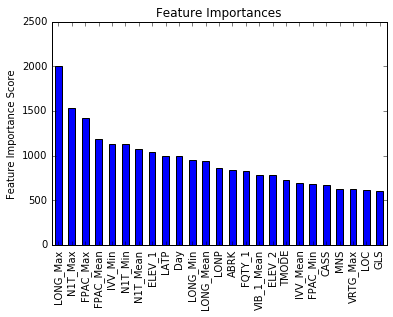

In [53]:
feat_imp_1[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

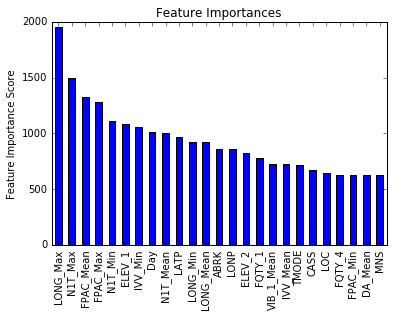

In [54]:
feat_imp_2[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')